# Libraries

In [8]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
#from structured import *
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [4]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [5]:
import urllib.request
def download(url):
    filename = url.split('/')[-1]
    f = urllib.request.urlopen(url)
    data = f.read()
    f.close()
    with open(filename, 'wb') as file:
        file.write(data)
# get file
download('https://raw.githubusercontent.com/VytautasV/cov2_blood/master/structured.py')
# import module
from structured import *

In [6]:
def read_multi_excel(path):
    '''
    Given a file path with wildcard and extension, parse all files with that extension in directory 
    into a single dataframe.
    '''
    
    all_files = glob.glob(path)
    li = []
    
    for filename in all_files:
        df = pd.read_excel(filename, index_col=None,
                           usecols=[*range(0,17)], header=[0], skiprows=[1], nrows=745) #skiprows=1
#        df.columns = df.columns.map(''.join)
#        print(str(filename))
#        print(df.shape)
#        print(df.columns)
        li.append(df)            
    df = pd.concat(li, axis=0, ignore_index=True)    
    return df

# Data

## Weather

In [356]:
weather = read_multi_excel('/home/vytas/ownCloud/DATA/Oras2020_1-10/*.xlsx')
weather.dropna(inplace=True)

In [357]:
weather[['date','time']] = weather['Data'].str.split(expand=True)
weather['date'] = pd.to_datetime(weather.date, format='%Y/%m/%d')
#weather['time'] = pd.to_datetime(weather.time.str.replace('24:','00:'))

In [358]:
weather = weather[['Temperatūra Min', 'Temperatūra Max', 'Temperatūra Moment',
       'Drėgmė Min', 'Drėgmė Max', 'Drėgmė Moment', 'Slėgis Moment',
       'Krituliai Sum', 'Vėjo kryptis Moment', 'Vėjo greitis Moment',
       'Vėjas Max Moment', 'Vėjas Max', 'date']]

In [359]:
weather.head(3)

,Temperatūra Min,Temperatūra Max,Temperatūra Moment,Drėgmė Min,Drėgmė Max,Drėgmė Moment,Slėgis Moment,Krituliai Sum,Vėjo kryptis Moment,Vėjo greitis Moment,Vėjas Max Moment,Vėjas Max,date
0,-0.10,0.20,0.16,98.00,99.00,99.00,1005.20,0.00,170.54,0.81,1.70,2.93,2020-12-01
1,0.10,0.40,0.40,99.00,100.00,100.00,1005.40,0.00,186.29,0.69,1.18,2.73,2020-12-01
2,0.40,0.50,0.40,99.00,100.00,100.00,1005.60,0.00,245.33,0.66,1.03,2.93,2020-12-01


In [360]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8266 entries, 0 to 8399
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Temperatūra Min      8266 non-null   float64       
 1   Temperatūra Max      8266 non-null   float64       
 2   Temperatūra Moment   8266 non-null   float64       
 3   Drėgmė Min           8266 non-null   float64       
 4   Drėgmė Max           8266 non-null   float64       
 5   Drėgmė Moment        8266 non-null   float64       
 6   Slėgis Moment        8266 non-null   float64       
 7   Krituliai Sum        8266 non-null   float64       
 8   Vėjo kryptis Moment  8266 non-null   float64       
 9   Vėjo greitis Moment  8266 non-null   float64       
 10  Vėjas Max Moment     8266 non-null   float64       
 11  Vėjas Max            8266 non-null   float64       
 12  date                 8266 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12)

In [361]:
weather_median = weather.groupby(weather.date).median()

In [362]:
weather_median.sort_index(inplace=True)

In [363]:
weather_median

,Temperatūra Min,Temperatūra Max,Temperatūra Moment,Drėgmė Min,Drėgmė Max,Drėgmė Moment,Slėgis Moment,Krituliai Sum,Vėjo kryptis Moment,Vėjo greitis Moment,Vėjas Max Moment,Vėjas Max
date,,,,,,,,,,,,
2020-01-01,1.75,2.55,2.42,83.00,86.50,85.00,1003.35,0.00,246.97,1.52,2.47,4.43
2020-01-02,2.20,2.40,2.25,91.00,92.00,91.00,1000.30,0.00,252.66,1.79,3.19,4.84
2020-01-03,0.50,0.60,0.59,69.50,74.00,72.50,996.35,0.00,221.00,1.27,2.57,3.88
2020-01-04,1.45,1.75,1.65,97.50,99.00,98.00,986.50,0.00,246.69,1.50,2.83,4.48
2020-01-05,-0.05,0.20,0.00,86.50,88.00,88.00,1003.21,0.00,232.79,0.72,1.31,2.73
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-06,1.55,1.90,1.69,90.50,93.50,91.00,1007.65,0.00,137.88,1.56,3.34,5.14
2020-12-07,-2.35,-1.70,-2.15,46.50,51.50,50.50,1008.00,0.00,136.70,1.25,2.42,4.12
2020-12-08,-4.90,-4.40,-4.88,74.00,76.00,75.00,1007.81,0.00,138.91,1.51,2.62,4.78


## Covid

In [243]:
cov2_all = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [244]:
cov2 = cov2_all[cov2_all.geoId=='LT']

In [245]:
display_all(cov2)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
33533,10/12/2020,10,12,2020,3327,31,Lithuania,LT,LTU,2794184.0,Europe,1153.395768
33534,09/12/2020,9,12,2020,3130,31,Lithuania,LT,LTU,2794184.0,Europe,1115.280883
33535,08/12/2020,8,12,2020,1390,36,Lithuania,LT,LTU,2794184.0,Europe,1045.027815
33536,07/12/2020,7,12,2020,1387,11,Lithuania,LT,LTU,2794184.0,Europe,1037.476415
33537,06/12/2020,6,12,2020,2219,15,Lithuania,LT,LTU,2794184.0,Europe,1070.401949
33538,05/12/2020,5,12,2020,2848,21,Lithuania,LT,LTU,2794184.0,Europe,1061.955834
33539,04/12/2020,4,12,2020,2516,26,Lithuania,LT,LTU,2794184.0,Europe,1041.091066
33540,03/12/2020,3,12,2020,2445,17,Lithuania,LT,LTU,2794184.0,Europe,1011.243354
33541,02/12/2020,2,12,2020,2106,28,Lithuania,LT,LTU,2794184.0,Europe,992.955367
33542,01/12/2020,1,12,2020,1190,13,Lithuania,LT,LTU,2794184.0,Europe,952.120548


In [246]:
cov2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 33533 to 33869
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     337 non-null    object 
 1   day                                                         337 non-null    int64  
 2   month                                                       337 non-null    int64  
 3   year                                                        337 non-null    int64  
 4   cases                                                       337 non-null    int64  
 5   deaths                                                      337 non-null    int64  
 6   countriesAndTerritories                                     337 non-null    object 
 7   geoId                                                       337 non-null    object 

In [247]:
cov2['dateRep'] = pd.to_datetime(cov2['dateRep'])

In [248]:
cov2 = cov2[['dateRep', 'cases', 'deaths', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']]

In [249]:
#cov2['cumulative_deaths'] = cov2.groupby(cov2.dateRep)['deaths'].cumsum()

In [250]:
cov2.head(3)

,dateRep,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
33533,2020-10-12,3327,31,1153.395768
33534,2020-09-12,3130,31,1115.280883
33535,2020-08-12,1390,36,1045.027815


## Mobility

In [251]:
mobility_all = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')
# mobility.columns = mobility.columns.str.rstrip('_percent_change_from_baseline')

/home/vytas/anaconda3/envs/COLAB/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [252]:
mobility = mobility_all[mobility_all.country_region_code=='LT']

In [253]:
mobility.columns = mobility.columns.str.replace(r'_percent_change_from_baseline$', '')

In [254]:
mobility['date'] = pd.to_datetime(mobility['date'])

In [255]:
mobility

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
1726674,LT,Lithuania,NaN,NaN,NaN,NaN,NaN,2020-02-15,2.0,4.0,44.0,9.0,1.0,-1.0
1726675,LT,Lithuania,NaN,NaN,NaN,NaN,NaN,2020-02-16,9.0,2.0,29.0,14.0,1.0,-2.0
1726676,LT,Lithuania,NaN,NaN,NaN,NaN,NaN,2020-02-17,2.0,0.0,15.0,0.0,-14.0,3.0
1726677,LT,Lithuania,NaN,NaN,NaN,NaN,NaN,2020-02-18,3.0,2.0,12.0,0.0,-13.0,3.0
1726678,LT,Lithuania,NaN,NaN,NaN,NaN,NaN,2020-02-19,3.0,0.0,18.0,-1.0,-14.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743969,LT,Lithuania,Vilnius County,Vilnius District Municipality,NaN,NaN,NaN,2020-12-02,-58.0,73.0,21.0,-7.0,-33.0,13.0
1743970,LT,Lithuania,Vilnius County,Vilnius District Municipality,NaN,NaN,NaN,2020-12-03,-58.0,83.0,6.0,-6.0,-33.0,13.0
1743971,LT,Lithuania,Vilnius County,Vilnius District Municipality,NaN,NaN,NaN,2020-12-04,-61.0,76.0,-7.0,-6.0,-33.0,13.0
1743972,LT,Lithuania,Vilnius County,Vilnius District Municipality,NaN,NaN,NaN,2020-12-05,-59.0,93.0,-8.0,-13.0,-13.0,5.0


In [256]:
mobility = mobility[['sub_region_1', 'date', 
    'retail_and_recreation', 'grocery_and_pharmacy', 'parks',
    'transit_stations', 'workplaces', 'residential']]

In [257]:
mobility = mobility[mobility.sub_region_1.isna()]

In [258]:
mobility.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 1726674 to 1726969
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sub_region_1           0 non-null      object        
 1   date                   296 non-null    datetime64[ns]
 2   retail_and_recreation  296 non-null    float64       
 3   grocery_and_pharmacy   296 non-null    float64       
 4   parks                  296 non-null    float64       
 5   transit_stations       296 non-null    float64       
 6   workplaces             296 non-null    float64       
 7   residential            296 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 20.8+ KB


## Join data by date

In [364]:
mobility.set_index(mobility.date, inplace=True)

In [365]:
cov2.set_index(cov2.dateRep, inplace=True)

In [366]:
cov2_m = cov2.join(mobility)

In [367]:
cov2_m_w = weather_median.join(cov2_m, lsuffix='_left')

In [368]:
cov2_m_w.drop('sub_region_1', axis=1, inplace=True)

In [369]:
cov2_m_w.dropna(inplace=True)

In [370]:
cov2_m_w.columns

Index(['Temperatūra Min', 'Temperatūra Max', 'Temperatūra Moment',
       'Drėgmė Min', 'Drėgmė Max', 'Drėgmė Moment', 'Slėgis Moment',
       'Krituliai Sum', 'Vėjo kryptis Moment', 'Vėjo greitis Moment',
       'Vėjas Max Moment', 'Vėjas Max', 'dateRep', 'cases', 'deaths',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', 'date',
       'retail_and_recreation', 'grocery_and_pharmacy', 'parks',
       'transit_stations', 'workplaces', 'residential'],
      dtype='object')

In [371]:
display_all(cov2_m_w)

,Temperatūra Min,Temperatūra Max,Temperatūra Moment,Drėgmė Min,Drėgmė Max,Drėgmė Moment,Slėgis Moment,Krituliai Sum,Vėjo kryptis Moment,Vėjo greitis Moment,Vėjas Max Moment,Vėjas Max,dateRep,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
date,,,,,,,,,,,,,,,,,,,,,,,
2020-02-15,0.45,0.60,0.58,89.00,95.00,90.50,1007.50,0.00,205.51,0.80,1.54,3.11,2020-02-15,0.00,0.00,0.00,2020-02-15,2.00,4.00,44.00,9.00,1.00,-1.00
2020-02-16,3.30,4.10,4.07,81.50,85.50,83.00,998.52,0.00,192.00,1.58,3.04,5.17,2020-02-16,0.00,0.00,0.00,2020-02-16,9.00,2.00,29.00,14.00,1.00,-2.00
2020-02-17,7.55,8.00,7.78,71.00,77.00,73.50,989.98,0.00,217.87,1.50,2.71,5.04,2020-02-17,0.00,0.00,0.00,2020-02-17,2.00,0.00,15.00,0.00,-14.00,3.00
2020-02-18,4.35,4.70,4.42,84.00,88.00,87.00,993.00,0.00,233.26,1.58,2.73,4.20,2020-02-18,0.00,0.00,0.00,2020-02-18,3.00,2.00,12.00,0.00,-13.00,3.00
2020-02-19,4.25,4.85,4.67,75.50,78.50,77.00,993.71,0.00,219.47,1.69,3.04,4.48,2020-02-19,0.00,0.00,0.00,2020-02-19,3.00,0.00,18.00,-1.00,-14.00,2.00
2020-02-20,3.50,4.00,3.65,79.50,82.00,80.95,999.88,0.00,234.77,0.84,1.65,2.37,2020-02-20,0.00,0.00,0.00,2020-02-20,2.00,2.00,17.00,2.00,-15.00,2.00
2020-02-21,2.35,2.65,2.52,87.00,89.00,88.50,998.04,0.00,199.72,1.33,2.52,4.61,2020-02-21,0.00,0.00,0.00,2020-02-21,-3.00,1.00,7.00,-1.00,-15.00,3.00
2020-02-22,3.20,3.70,3.58,93.00,95.50,93.50,997.45,0.00,208.91,1.79,3.40,5.56,2020-02-22,0.00,0.00,0.00,2020-02-22,-6.00,-2.00,-11.00,1.00,-1.00,0.00
2020-02-23,3.70,4.30,3.95,72.00,81.00,75.41,982.51,0.00,248.22,2.86,4.76,7.17,2020-02-23,0.00,0.00,0.00,2020-02-23,0.00,2.00,8.00,1.00,1.00,-1.00


In [372]:
cov2_m_w = cov2_m_w.drop('dateRep', axis=1)

## Feature engineering

In [373]:
add_datepart(cov2_m_w, 'date', drop=True, time=False, errors="raise")

In [374]:
cov2_m_w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 276 entries, 2020-02-15 to 2020-12-06
Data columns (total 34 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Temperatūra Min                                             276 non-null    float64
 1   Temperatūra Max                                             276 non-null    float64
 2   Temperatūra Moment                                          276 non-null    float64
 3   Drėgmė Min                                                  276 non-null    float64
 4   Drėgmė Max                                                  276 non-null    float64
 5   Drėgmė Moment                                               276 non-null    float64
 6   Slėgis Moment                                               276 non-null    float64
 7   Krituliai Sum                                               276 non-nu

In [375]:
cov2_m_w

,Temperatūra Min,Temperatūra Max,Temperatūra Moment,Drėgmė Min,Drėgmė Max,Drėgmė Moment,Slėgis Moment,Krituliai Sum,Vėjo kryptis Moment,Vėjo greitis Moment,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
date,,,,,,,,,,,,,,,,,,,,,
2020-02-15,0.45,0.60,0.58,89.00,95.00,90.50,1007.50,0.00,205.51,0.80,...,15,5,46,False,False,False,False,False,False,1581724800
2020-02-16,3.30,4.10,4.07,81.50,85.50,83.00,998.52,0.00,192.00,1.58,...,16,6,47,False,False,False,False,False,False,1581811200
2020-02-17,7.55,8.00,7.78,71.00,77.00,73.50,989.98,0.00,217.87,1.50,...,17,0,48,False,False,False,False,False,False,1581897600
2020-02-18,4.35,4.70,4.42,84.00,88.00,87.00,993.00,0.00,233.26,1.58,...,18,1,49,False,False,False,False,False,False,1581984000
2020-02-19,4.25,4.85,4.67,75.50,78.50,77.00,993.71,0.00,219.47,1.69,...,19,2,50,False,False,False,False,False,False,1582070400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-02,-2.80,-2.05,-2.15,95.50,97.00,96.00,1012.06,0.00,82.71,0.87,...,2,2,337,False,False,False,False,False,False,1606867200
2020-12-03,-0.20,0.00,-0.04,93.50,94.50,94.00,1003.50,0.00,137.87,0.92,...,3,3,338,False,False,False,False,False,False,1606953600
2020-12-04,1.60,1.70,1.70,91.00,92.00,91.00,998.38,0.00,154.75,1.47,...,4,4,339,False,False,False,False,False,False,1607040000


# Feature importance

## Deaths

In [508]:
y = cov2_m_w.deaths
X = cov2_m_w.drop('deaths', axis=1)

### Parameter search

In [527]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 14  # same as Kaggle's test set size
n_trn = len(X)-n_valid
#raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(X, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((262, 33), (262,), (14, 33), (14,))

In [539]:
m = ExtraTreesRegressor(n_jobs=-1, n_estimators=200, max_features=None, min_samples_leaf=5, bootstrap=True, oob_score=True)
m.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=True, max_features=None, min_samples_leaf=5,
                    n_estimators=200, n_jobs=-1, oob_score=True)

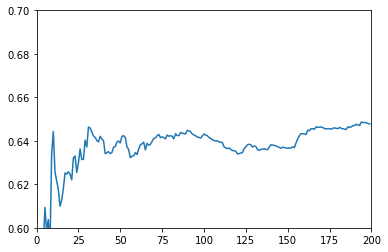

In [540]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
plt.xlim(0,200)
plt.ylim(0.60, 0.7)
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(200)])

In [574]:
# Number of features to consider at every split
max_features = ['log2', 'sqrt', 0.5, None] # sqrt = auto

# Maximum number of levels in tree
min_samples_leaf = [1, 3, 5, 10] #25, 100

random_grid = {'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}
               #'n_estimators': n_estimators}

print(random_grid)

rf = ExtraTreesRegressor(n_estimators=70) #ExtraTrees
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 30, cv = 5, verbose=2, random_state=10, n_jobs=-1) #scoring = 'precision_weighted'

search = rf_random.fit(X, y)
print('Par:', search.best_params_)
print('Score:', search.best_score_)

{'min_samples_leaf': [1, 3, 5, 10], 'max_features': ['log2', 'sqrt', 0.5, None]}
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


Par: {'min_samples_leaf': 5, 'max_features': 0.5}
Score: 0.7165523739339791


[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.4s finished


### Most important features

In [566]:
m = ExtraTreesRegressor(n_jobs=-1, n_estimators=70, max_features=0.5, min_samples_leaf=3, bootstrap=True, oob_score=True)
m.fit(X, y)

ExtraTreesRegressor(bootstrap=True, max_features=0.5, min_samples_leaf=3,
                    n_estimators=70, n_jobs=-1, oob_score=True)

In [575]:
m.oob_score_

0.7447494581086538

In [504]:
pd.options.display.float_format = '{:.2f}'.format

In [576]:
fi = rf_feat_importance(m, X)

In [577]:
fi[:10]

,cols,imp
13,Cumulative_number_for_14_days_of_COVID-19_case...,0.44
12,cases,0.33
32,Elapsed,0.03
22,Week,0.03
21,Month,0.02
25,Dayofyear,0.02
23,Day,0.02
14,retail_and_recreation,0.01
17,transit_stations,0.01
3,Drėgmė Min,0.01


<AxesSubplot:ylabel='cols'>

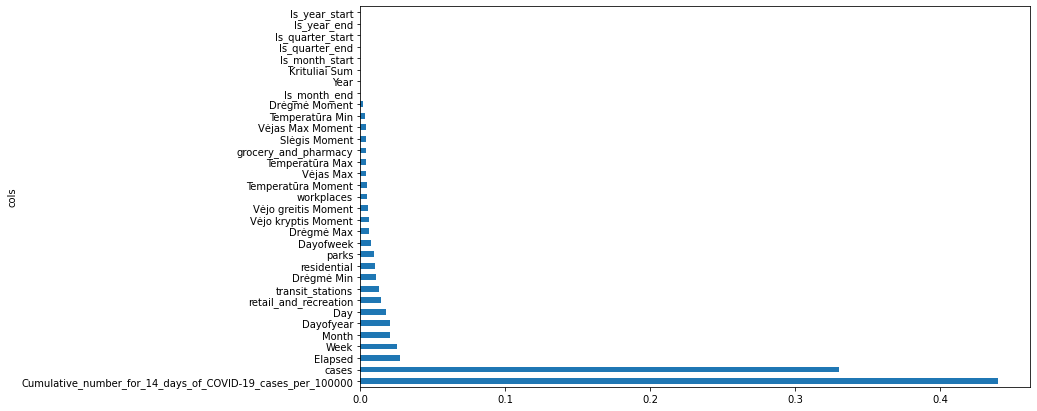

In [578]:
plot_fi(fi)

In [579]:
to_keep = fi[fi.imp>0.008].cols; len(to_keep)

12

In [580]:
df_keep = X[to_keep].copy()

In [581]:
m = ExtraTreesRegressor(n_jobs=-1, n_estimators=70, max_features=0.5, min_samples_leaf=5, bootstrap=True, oob_score=True)
m.fit(df_keep, y)
m.oob_score_

0.7502843220332549

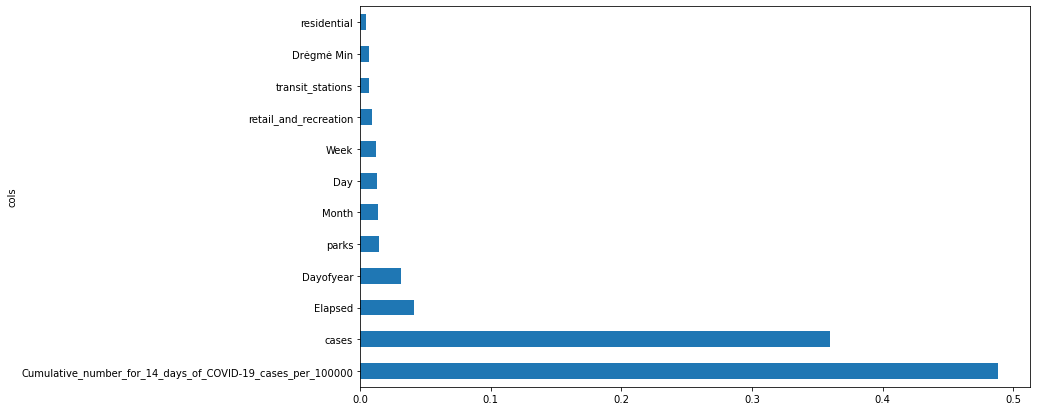

In [582]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

In [583]:
fi

,cols,imp
0,Cumulative_number_for_14_days_of_COVID-19_case...,0.49
1,cases,0.36
2,Elapsed,0.04
5,Dayofyear,0.03
11,parks,0.01
4,Month,0.01
6,Day,0.01
3,Week,0.01
7,retail_and_recreation,0.01
8,transit_stations,0.01


## Cases

In [612]:
y = cov2_m_w.cases
X = cov2_m_w.drop(['deaths','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000','cases'], axis=1) #'deaths'

In [634]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 14  # same as Kaggle's test set size
n_trn = len(X)-n_valid
#raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(X, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((262, 31), (262,), (14, 31), (14,))

In [660]:
m = ExtraTreesRegressor(n_jobs=-1, n_estimators=200, max_features=None, min_samples_leaf=5, bootstrap=True, oob_score=True)
m.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=True, max_features=None, min_samples_leaf=5,
                    n_estimators=200, n_jobs=-1, oob_score=True)

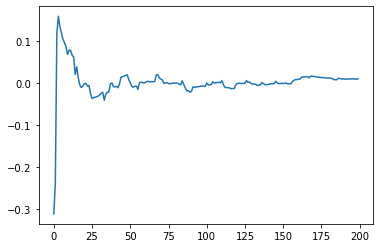

In [661]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
# plt.xlim(0,200)
# plt.ylim(0.60, 0.7)
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(200)])

In [675]:
# Number of features to consider at every split
max_features = ['log2', 'sqrt', 0.5, None] # sqrt = auto

# Maximum number of levels in tree
min_samples_leaf = [1, 3, 5, 10] #25, 100

random_grid = {'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}
               #'n_estimators': n_estimators}

print(random_grid)

rf = ExtraTreesRegressor(n_estimators=50) #ExtraTrees
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 30, cv = 5, verbose=2, random_state=10, n_jobs=-1) #scoring = 'precision_weighted'

search = rf_random.fit(X, y)
print('Par:', search.best_params_)
print('Score:', search.best_score_)

{'min_samples_leaf': [1, 3, 5, 10], 'max_features': ['log2', 'sqrt', 0.5, None]}
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


Par: {'min_samples_leaf': 5, 'max_features': None}
Score: 0.053997841543649304


[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished


In [676]:
m = ExtraTreesRegressor(n_jobs=-1, n_estimators=50, max_features=None, min_samples_leaf=5, bootstrap=True, oob_score=True)
m.fit(X, y)

ExtraTreesRegressor(bootstrap=True, max_features=None, min_samples_leaf=5,
                    n_estimators=50, n_jobs=-1, oob_score=True)

In [678]:
m.oob_score_

0.3906914407489409

In [679]:
fi = rf_feat_importance(m, X)

In [681]:
fi[:15]

,cols,imp
21,Day,0.21
20,Week,0.15
23,Dayofyear,0.13
30,Elapsed,0.11
19,Month,0.05
3,Drėgmė Min,0.05
13,grocery_and_pharmacy,0.03
12,retail_and_recreation,0.02
5,Drėgmė Moment,0.02
9,Vėjo greitis Moment,0.02
